# Introducción al Aprendizaje por Refuerzo

<center><img src='https://la.mathworks.com/discovery/reinforcement-learning/_jcr_content/mainParsys3/discoverysubsection/mainParsys/image.adapt.1200.medium.png/1701680709128.png' width="500" /></center>

Seguramente ya conoces las 2 grandes áreas de aprendizaje de máquina: el aprendizaje supervisado y el aprendizaje no supervisado. Parece difícil que aquí hubiera espacio para otras opciones; sin embargo sí la hay y es el Aprendizaje por refuerzo.

En aprendizaje por refuerzo (ó Reinforcement Learning en inglés) no tenemos una “etiqueta de salida”, por lo que no es de tipo supervisado y si bien estos algoritmos aprenden por sí mismos, tampoco son de tipo no supervisado, en donde se intenta clasificar grupos teniendo en cuenta alguna distancia entre muestras.

**El aprendizaje por refuerzo es una técnica en la que un agente aprende a realizar tareas a través de prueba y error en repetidas interacciones con el entorno.**

Esta interacción permite que el agente realice una serie de decisiones que máximicen una recompensa para las tareas, sin intervención humana y sin programación explicita de las tareas a realizar(automatización).

## Diferencia de otros aprendizajes:

* No hay un supervisor presente, que dicte que la acción esta bien hecha
* El tiempo es importante, ya que la ejecución de una determinada acción afectará los estados subsecuentes y esta a su vez dependerá de estados anteriores
* Tiene recompensas retrasadas: Obteniendose una recompensa total hasta el final de un episodio
* Maximiza las recompensas: contrario a otros aprendizajes que buscan minimizar la función de coste o error.



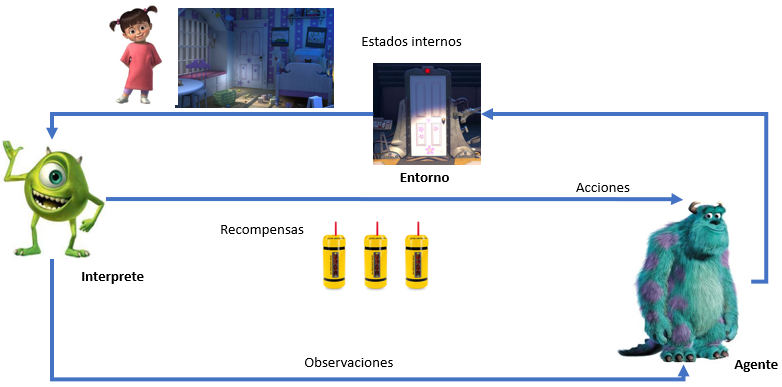

## Componentes de un RL
* **Agente**: Es el modelo a entrenar para la toma de decisiones
* **Entorno o ambiente**: Es todo con lo que interactua el agente, donde se mueve, que percibe, incertidumbres, etc. Estas contienen limitaciones y reglas en cada momento.
* **Acciones**: Posibles tareas o ejecuciones que puede realizar en un determinado momento el agente.
* **Estado (observaciones)**: Indicadores observables del entorno en cada momento obtenidas por un interprete u observador.
* **Recompensas (o castigos)**: Premios o penalizaciones que orientan al agente para saber si lo que hizo esta medio bien o mal.
* **Política** : Función de decisión que aprenderá en base a prueba y error. Será usada para nuevas decisiones.


Escenario común de aprendizaje por refuerzo:
1. El agente interactúa con su entorno en pasos de tiempo discretos $t$.
2. En cada paso de tiempo, el ambiente produce un estado $s_t$ del espacio de estados $\mathcal{S}$
3. Al recibir el agente dicha observación o estado del ambiente, el agente realiza una acción según una política $\pi(a_t|s_t)$ que representa la probabilidad de tomar una acción $a_t$ del conjunto de acciones posibles $\mathcal{A}$ (o en un ambiente determinista $\pi(s_t)=a_t$) estando en el estado $s_t$
4. La ejecución de esta acción influye sobre el entorno, cambiando su estado a uno nuevo. Un paso de tiempo después $t+1$, el entorno le comunica al agente a través de un observador el valor de una nueva recompensa $r_{t+1} \in \mathbb{R}$ y el nuevo estado del entorno $s_{t+1}$

Obteniendo así una secuencia de estados, acciones y recompensas:
\begin{align*}
  \ t=0: \quad & s_0 → a_0 \\
  \ t=1: \quad & r_1, s_1 → a_1 \\
  \ t=2: \quad & r_2, s_2 → a_2 \\
\end{align*}


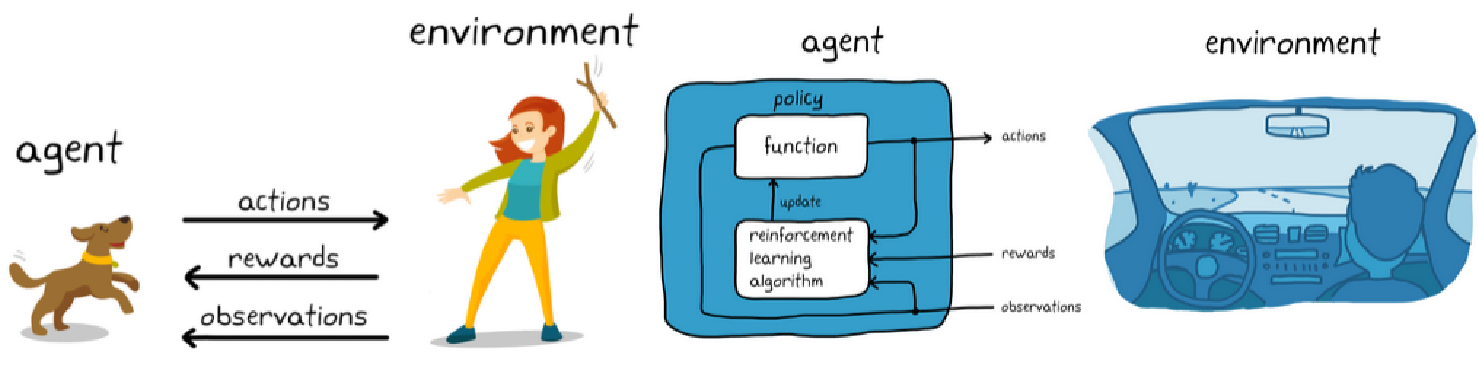

## Aplicaciones de RL

* Juegos de mesa, estrategía. Estados: pixeles, acciones: movimientos válidos, recompensas: puntuación
* Robótica
* Automatización
* Control de proceso
* Aproximación de funciones
* Toma de decisiones financieras, estrategías, inversiones, precios, etc.

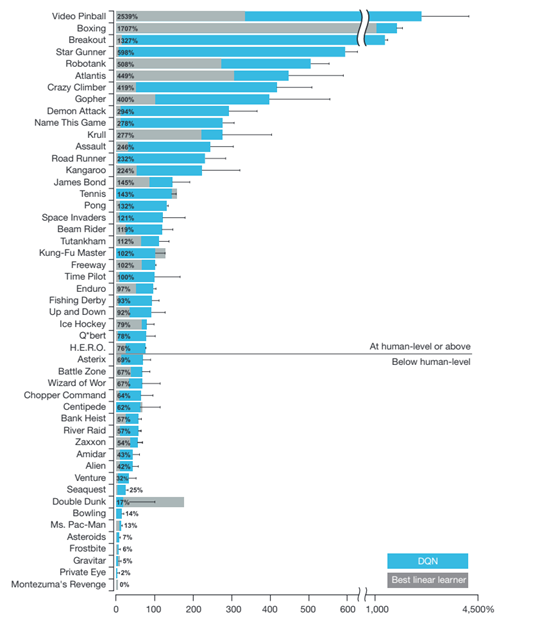

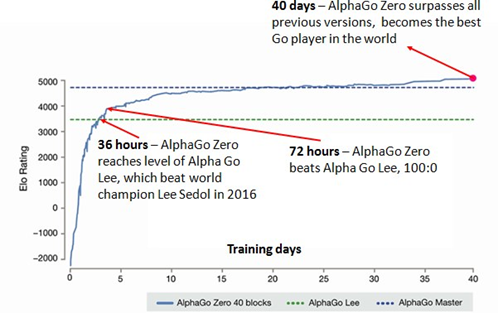

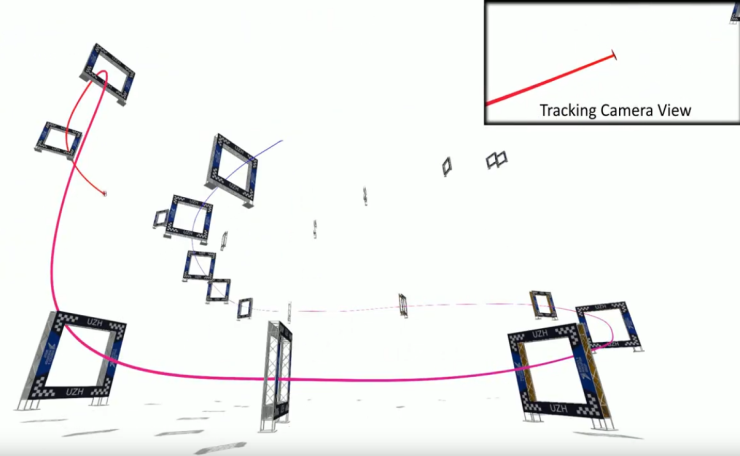

# Más teoría RL

Además del agente y del entorno, formalmente un sistema de aprendizaje por refuerzo contiene cuatro elementos principales \cite{sutton}:


*   **Política ($\pi$)**. Es un mapeo del conjunto de estados del entorno $\mathcal{S}$ al conjunto de las posibles acciones $\mathcal{A}$, i.e., la política $\pi$ toma un estado $s$ como entrada y regresa una acción $a$ como salida. Hay dos tipos de políticas.
  
  Una política determinista es un mapeo $\pi: \mathcal{S} \rightarrow \mathcal{A}$ (p.ej., si la batería de un robot es baja entonces la acción del robot es ir a recargar la batería, tal que $\pi(baja)=recargar$).
  
  Una política estocástica es una mapeo $\pi: \mathcal{S} \times \mathcal{A} \rightarrow [0,1]$, i.e., la política genera como salida la probabilidad de que el agente tome la acción $a$ dado que se encuentra en el estado $s$:
    \begin{equation}
        \pi(a|s)=P(A_t=a|S_t=s)
    \end{equation}
  
* **Señal de recompensa ($r$)**. Es un valor escalar que define el objetivo del problema de aprendizaje por refuerzo. En términos generales guía al agente en su aprendizaje indicándole qué tan buenas o malas son las acciones que toma. También se podría pensar que es la forma de comunicar al agente qué es lo que queremos que se logre, no el cómo queremos que el agente logre la recompensa.

  El objetivo del agente es maximizar la recompensa acumulada, a esta medida se le conoce como **retorno esperado $G_t$**. Si el agente se encuentran en el tiempo $t$, el retorno esperado a partir de dicho momento se define como la suma de recompensas para cada acción futura:
  \begin{equation}
     G_t = r_{t+1} + r_{t+2} + r_{t+3} + \cdots + r_T
  \end{equation}

  donde $T$ es el estado terminal en una tarea episódica. Sin embargo, las tareas continuas no tienen un límite $T$ lo que ocasiona que la ecuaciones anterior se vuelva una suma infinita.
  
  Para asegurar convergencia a un valor finito, se introduce un factor de descuento $\gamma \in [0,1]$, resultando en la siguiente ecuación:
  
  \begin{equation}
    G_t = r_{t+1} + \gamma r_{t+2} + \gamma^{2}r_{t+3} + \cdots = \sum_{t=0}^{\infty}\gamma^t r_{t+1}
  \end{equation}

  El factor de descuento $\gamma$ determina la importancia de las recompensas futuras. Un factor de $\gamma=0$ hará que el agente sea miope y únicamente tenga en cuenta las recompensas actuales ($G_t=r_{t+1}$), mientras que un factor $\gamma=1$ hará que el agente se esfuerce por obtener una recompensa alta a largo plazo, dicho de otra forma, a mientras mayor sea el valor de $\gamma$ el agente se preocupa más por el futuro lejano, mientras menor sea el valor de $\gamma$ el agente se preocupa más por las recompensas inmediatas.

* **Función de valor ($\nu(s)$)**: Para que la política $\pi$ del agente decida qué acción tomar en el tiempo $t$, el agente necesita estimar que tan bueno es estar en un cierto estado, i.e., la cantidad total de recompensa que un agente puede esperar acumular en el futuro partiendo de ese estado, la función de valor cuantifica entonces el retorno esperado para el estado $s$ siguiendo la política $\pi$. De manera intuitiva, si un estado es muy cercano al estado objetivo, por lo general el valor será alto, mientras que, si cualquier acción en un determinado estado aleja al agente del objetivo, el valor será bajo.

  Dado que las recompensas que el agente puede esperar en el futuro dependen de la acción que tome, la función valor se define con respecto a la política $\pi$. El valor de un estado $s$ siguiendo la política $\pi$, denotado como $\nu_\pi(s)$, es el retorno esperado si el agente empieza en el estado $s$ y sigue la política $\pi$ para seleccionar todas las acciones para cada paso de tiempo:
  
  \begin{equation}
      \nu_\pi(s) = \mathbb{E}_\pi[G_t|S_t=s] = \mathbb{E}_\pi \left [ \sum_{t=0}^{\infty}\gamma^t r_{t+1} |S_t=s \right ]
  \end{equation}

  donde $\mathbb{E}_\pi[\cdot]$ es el valor esperado de una variable aleatoria. De manera análoga existe una función de valor para acciones llamada función acción-valor $q_\pi(s,a)$ la cual cuantifica el retorno esperado si el agente se encuentra en el estado $s$ y realiza una acción $a$ siguiendo la política $\pi$ para seleccionar todas las acciones para cada paso de tiempo:

  \begin{equation}
    q_\pi(s,a) = \mathbb{E}_\pi[G_t|S_t=s, A_t=a] = \mathbb{E}_\pi \left [ \sum_{t=0}^{\infty}\gamma^t r_{t+1} |S_t=s, A_t=a \right ]  
  \end{equation}

  Una propiedad fundamental de las funciones de valor es que satisfacen una relación recursiva entre el valor de un estado y el valor de sus estados sucesores inducida por la propiedad de Markov. La ecuación de Bellman para $\nu_\pi$ expresa esta relación:
    
  \begin{equation}
    \nu_\pi(s)=\sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma\nu_\pi(s')],~\forall s \in \mathcal{S}
  \end{equation}

  La de Bellman calcula la media de todas las posibilidades y las pondera por su probabilidad de ocurrencia. En resumen, el valor del estado inicial debe ser igual al valor descontado de sus próximo estado esperado más la recompensa. En la Figura se ilustra lo descrito utilizando diagramas *backup* para $\nu_\pi$ y $q_\pi$, donde cada círculo blanco representa un estado, cada círculo negro representa un par estado-acción, y las flechas representan las recompensas.

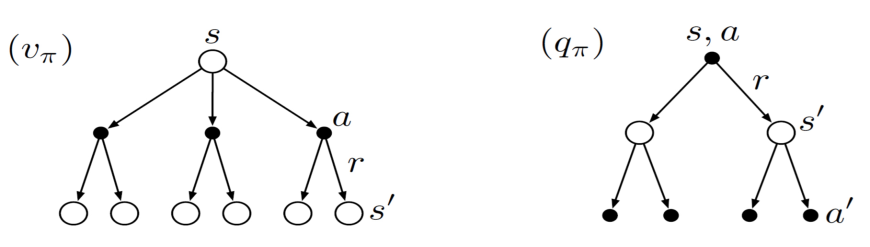

# Resumen



* Política: Función que regresa la acción de acuerdo al estado actual. Contendrá el aprendizaje del agente.
\begin{equation}
        \pi(a|s)=P(A_t=a|S_t=s)
\end{equation}

* Recompensa: Valor escalar para premiar o castigar al agente por lo realizado
* Retorno acumulado: Recompensa acumulada durante un episodio en un tiempo $t$
  \begin{equation}
     G_t = r_{t+1} + r_{t+2} + r_{t+3} + \cdots + r_T
  \end{equation}
* Retorno acumulado con descuento: Acumula la recompensa durante un episodio mientras castiga las recompensas que tardan más en terminar.
\begin{equation}
    G_t = r_{t+1} + \gamma r_{t+2} + \gamma^{2}r_{t+3} + \cdots = \sum_{t=0}^{\infty}\gamma^t r_{t+1}
\end{equation}
* Función de valor: Evalua el retorno esperado en función de una política realizada, a partir del estado actual.
\begin{equation}
      \nu_\pi(s) = \mathbb{E}_\pi[G_t|S_t=s] = \mathbb{E}_\pi \left [ \sum_{t=0}^{\infty}\gamma^t r_{t+1} |S_t=s \right ]
\end{equation}
* Función valor-acción (Quality): Cauntifica el retorno esperado si el agente se encuentra en el estado $s$ y realiza una acción $a$ siguiendo la política $\pi$.
\begin{equation}
    q_\pi(s,a) = \mathbb{E}_\pi[G_t|S_t=s, A_t=a] = \mathbb{E}_\pi \left [ \sum_{t=0}^{\infty}\gamma^t r_{t+1} |S_t=s, A_t=a \right ]  
  \end{equation}

Estás dos últimas funciones tiene una forma parecida a la ecuación del Bellman

\begin{equation}
    \nu_\pi(s)=\sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma\nu_\pi(s')],~\forall s \in \mathcal{S}
\end{equation}

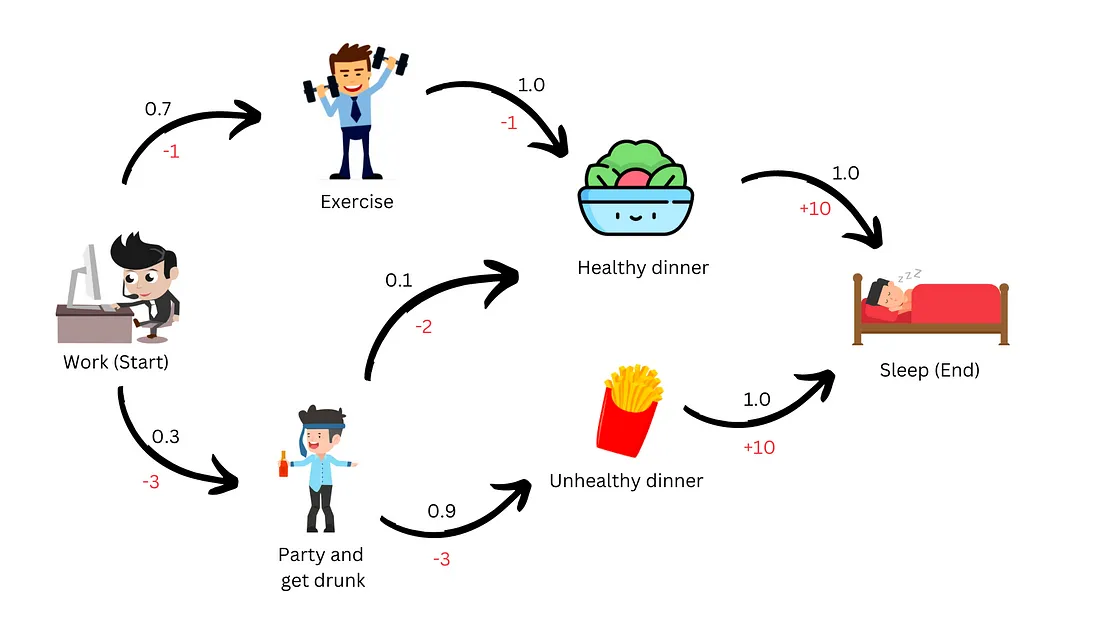

# Principales algoritmos de RL

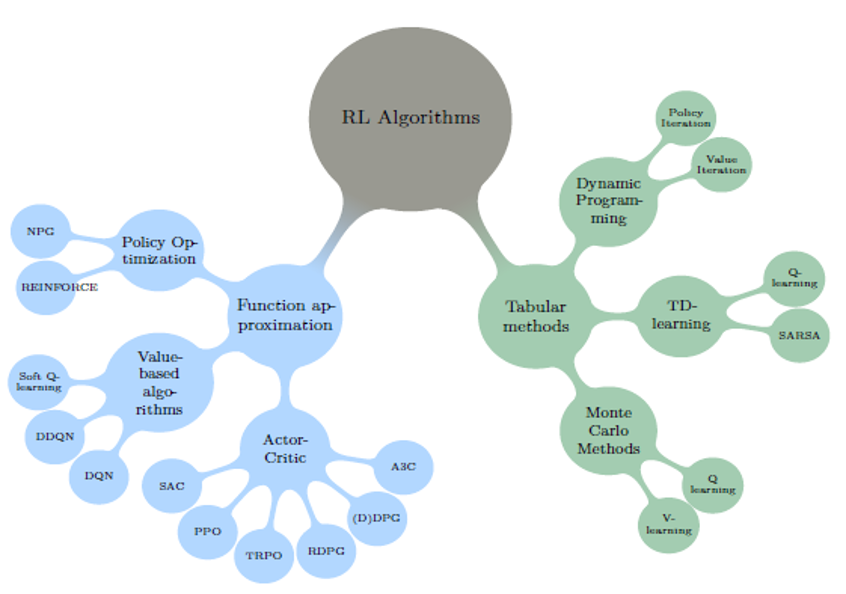

# Diseño RL

## Desarrollo de un sistema con aprendizaje por refuerzo

1. Diseñar un entorno que involucre la mayoría de los escenarios e incertidumbres que puede enfrentar el agente
2. Diseñar (rediseñar, rediseñar ...) las recompensas para lograr un funcionamiento optimo del agente
3. Diseñar el modelo que representará al agente
4. Entrenar el agente hasta que se maximice la recompensa
5. Incorporar el agente a un prototipo real y regresar al punto 1 si es que no se cumplen los criterios en el mundo real.

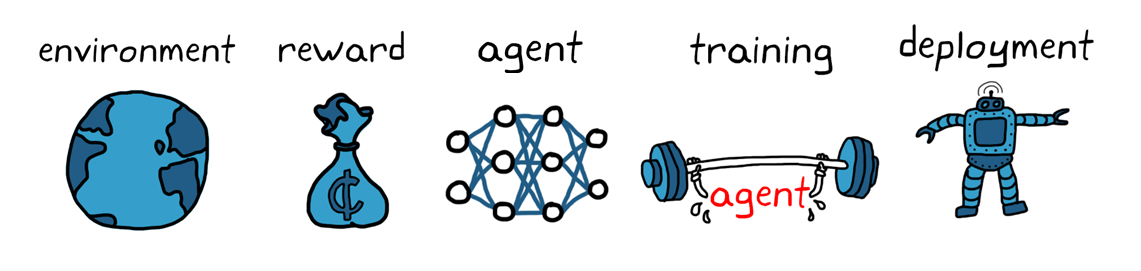

In [ ]:
# Si estas en colab ejecutar. Para Jupyter realizar en consola
!pip install gymnasium
!pip install renderlab
!apt update && apt install xvfb
!pip install gym-notebook-wrapper

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.9 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [662 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,054 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archi

### función para extraer información del entorno

In [ ]:
import gymnasium as gym
import renderlab as rl

In [ ]:
def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Nondeterministic: {spec.nondeterministic}")
    print(f"Reward Range: {env.reward_range}")
    print(f"Reward Threshold: {spec.reward_threshold}")

In [ ]:
query_environment("CartPole-v1")

Action Space: Discrete(2)
Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Max Episode Steps: 500
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 475.0


In [ ]:
env = gym.make("CartPole-v1", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
  action = env.action_space.sample()
  observation, reward, terminated, truncated, info = env.step(action)

  if terminated or truncated:
    break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
query_environment("FrozenLake-v1")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7


<center><img src='https://aleksandarhaber.com/wp-content/uploads/2022/11/Clipboard02.jpg' width="250" /></center>
<center><img src='https://aleksandarhaber.com/wp-content/uploads/2022/11/file1-2-624x624.png' width="250" /></center>


In [ ]:
env = gym.make("FrozenLake-v1", render_mode = "rgb_array")
# action space: left -0, down - 1, right - 2, up- 3
# obsevation space: 16 states
env = rl.RenderFrame(env, "./output")
observation, info = env.reset()
n=0
while True:
  #generate random action
  action = env.action_space.sample()
  observation, reward, terminated, truncated, info = env.step(action)
# format of returnValue is (observation,reward, terminated, truncated, info)
# observation (object)  - observed state
# reward (float)        - reward that is the result of taking the action
# terminated (bool)     - is it a terminal state
# truncated (bool)      - it is not important in our case
# info (dictionary)     - in our case transition probability
  print(action, observation, reward, info, terminated, truncated)
  if terminated or truncated:
    break

env.play()

3 0 0.0 {'prob': 0.3333333333333333} False False
1 0 0.0 {'prob': 0.3333333333333333} False False
1 0 0.0 {'prob': 0.3333333333333333} False False
2 1 0.0 {'prob': 0.3333333333333333} False False
2 5 0.0 {'prob': 0.3333333333333333} True False
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# restart enviroment
observation, info = env.reset()
print(observation, reward, info, terminated, truncated)
# perform deterministic step 0,1,2,3
for action in [0,0,1,1,1,2]:
  observation, reward, terminated, truncated, info = env.step(action)
  print(observation, reward, info, terminated, truncated)
  if terminated or truncated:
    break
env.play()


0 0.0 {'prob': 1} True False
4 0.0 {'prob': 0.3333333333333333} False False
0 0.0 {'prob': 0.3333333333333333} False False
0 0.0 {'prob': 0.3333333333333333} False False
4 0.0 {'prob': 0.3333333333333333} False False
4 0.0 {'prob': 0.3333333333333333} False False
5 0.0 {'prob': 0.3333333333333333} True False
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Q-learning

Q-learning es el algoritmo de aprendizaje por refuerzo mas antiguo, pero más utilizado para aprender conceptos básicos.

Para entender como trabaja, primero consideremos la recompensa esperada.

$$ R = \sum_{t=0}^{\infty} {\gamma^t r_t} $$

donde $r_t$ es una valor de recompensa (retorno) obtenido en el el tiempo $t$ y $\gamma$ es una tasa de descuento.

Como ejemplo para entender esta recompensa, imagina que quieres tomar un objeto con tu brazo de la mesa. Para esto necesitas realizar varias acciones:

1. Estirar (posicionar) el brazo para alcanzar el objeto: recompensa 0
2. Abrir la mano: recompensa 0
3. Cerrar la mano: recompensa 10

En este caso conseguiste una valor de recompensa hasta la acción #3 ($t=2$), sin embargo, las dos acciones anteriores contribuyen a la obtener esta recompensa final. Si consideramos que la acción #1 tiene la recompensa acumulada con el factor de descuento $\gamma=0.99$.

$$ R_{t=0} = 0 + 0.99 \times 0 + 0.99^2 \times 10 = 9.801 $$

Lo mismo para las recompensas posteriores, $R_{t=1} = 9.9, R_{t=2} = 10$.

El valor-Q esta basado en la idea de la recompensa acumulada esperada.
Dependiendo de cada estado, la acción tiene su correspondiente recompensa esperada.

Del ejemplo anterior, si tus estás en un estado=observo el objeto, la acción=estirar el brazo tendrá la mayor recompensa esperada. Sin embargo, si no puedes ver el objeto, la acción=estirar brazo tendrá una recompensa esperada con valor bajo.

Así, la tabla-Q $Q(s,a)$ se forma con los correspondientes valores-Q para cada estado y acción del entorno.

![Q-Table](https://github.com/tsmatz/reinforcement-learning-tutorials/blob/master/assets/q-table.png?raw=1)

En la práctica, tanto los espacios de acción como de observación pueden tener más de una dimensión.
Por ejemplo, en CartPole ([readme.md](https://github.com/tsmatz/reinforcement-learning-tutorials/)) cuenta con 4 dimensiones (flotantes) (estados observados) y dos acciones (discretas), por lo que la tabla-Q tendrá la combinación de estas 2 acciones y 4 estados.

Así, Q-Learning optimiza la tabla siguiendo un proceso iterativo de actualizaciones ($t=0,1,2,\ldots$).
Dando pie a la siguiente ecuación:
$$ Q_{t+1}(s_t,a_t) = Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $$

donde $\alpha$ es la tasa de aprendizaje.

Así, aplicando la acción $a_t$ en el estado $s_t$, se obtiene una recompensa $r_t$ y un nuevo estado $s_{t+1}$

Suppose, you executed an action $a_t$ on state $s_t$, and as a result, you got reward $r_t$ and the state has changed to $s_{t+1}$.
* La siguiente acción óptima debe cumplir $a_{t+1}=\max_{a}{Q(s_{t+1},a)}$ obteniendo la recompensa esperada: $r_t + \gamma \max_{a}{Q(s_{t+1},a)}$.

quicklatex.com-146067a08e0923757c6fa7e595b3e0ab_l3.svg